In [36]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [37]:
print("Hello, PCS!")

Hello, PCS!


In [38]:
# Load the Iris dataset
iris = load_iris()
X = iris.data # Features
y = iris.target # Target labels
feature_names = iris.feature_names
print("Feature names:", feature_names)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [39]:
# get the shape of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (150, 4)
Shape of y: (150,)


In [40]:
# standardize the data
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_stdzd = (X - X_mean) / X_std

In [41]:
cov_matrix = np.cov(X_stdzd.T)  # Note the .T for transpose
print("Covariance matrix:\n", cov_matrix)

Covariance matrix:
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [42]:
# Obtain eigenvalues and eigenvectors
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print("Eigenvalues:\n", eig_vals)
print("Eigenvectors:\n", eig_vecs)

Eigenvalues:
 [2.93808505 0.9201649  0.14774182 0.02085386]
Eigenvectors:
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [43]:
# sorted eigenvalues and eigenvectors
sorted_idx = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[sorted_idx]
eig_vecs = eig_vecs[:, sorted_idx]

In [44]:
# Obtain the explained variance by each component
total_variance = np.sum(eig_vals)
explained_variance = eig_vals
explained_variance_ratio = explained_variance / total_variance
cumulative_variance = np.cumsum(explained_variance_ratio)

print("Explained variance per PC:\n", explained_variance)
print("Explained variance ratio:\n", explained_variance_ratio)
print("Cumulative explained variance:\n", cumulative_variance)


Explained variance per PC:
 [2.93808505 0.9201649  0.14774182 0.02085386]
Explained variance ratio:
 [0.72962445 0.22850762 0.03668922 0.00517871]
Cumulative explained variance:
 [0.72962445 0.95813207 0.99482129 1.        ]


([<matplotlib.axis.XTick at 0x75f2d8048f10>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')])

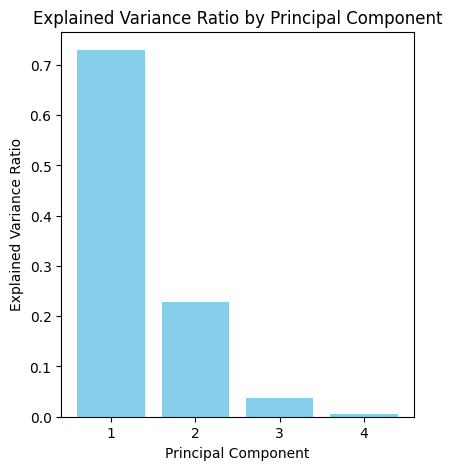

In [45]:
# Plot the explained variance
plt.figure(figsize=(10, 5))

# Bar chart for explained variance ratio
plt.subplot(1, 2, 1)
plt.bar(range(1, 5), explained_variance_ratio, color='skyblue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.xticks([1, 2, 3, 4])

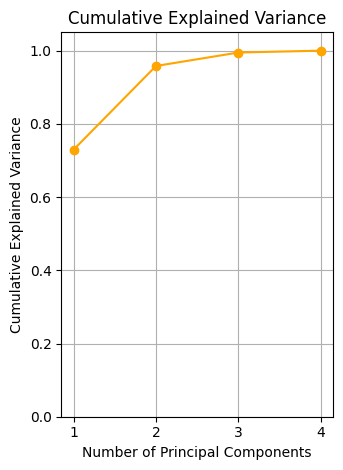

In [46]:
# Line chart for cumulative expained variance
plt.subplot(1, 2, 2)
plt.plot(range(1, 5), cumulative_variance, marker='o', color='orange')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.xticks([1, 2, 3, 4])
plt.ylim(0, 1.05)
plt.grid()
plt.tight_layout()
plt.show()

In [47]:
W = eig_vecs[:, :2]
X_pca = X_stdzd.dot(W)

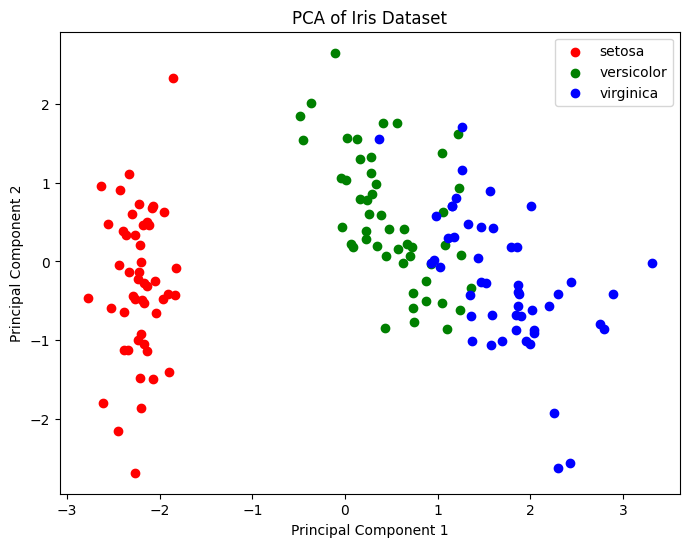

In [48]:
# plot the PCA result
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']

for label, color in zip([0,1,2], colors):
    plt.scatter(
        X_pca[y == label, 0], 
        X_pca[y == label, 1], 
        label=iris.target_names[label], 
        color=color
    )
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
# plt.grid()
plt.show()